<a href="https://colab.research.google.com/github/KuJoJot4ro/College-Python/blob/main/Case_Study_for_AAPL_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


📊 Preview of Data:
Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2019-01-02  37.667183  37.889009  36.787041  36.944466  148158800
1      2019-01-03  33.915260  34.757238  33.869941  34.342211  365248800
2      2019-01-04  35.363075  35.432248  34.299275  34.473394  234428400
3      2019-01-07  35.284359  35.499030  34.800162  35.468021  219111200
4      2019-01-08  35.956982  36.212200  35.425082  35.673142  164101200
✅ Mean Squared Error: 5.86


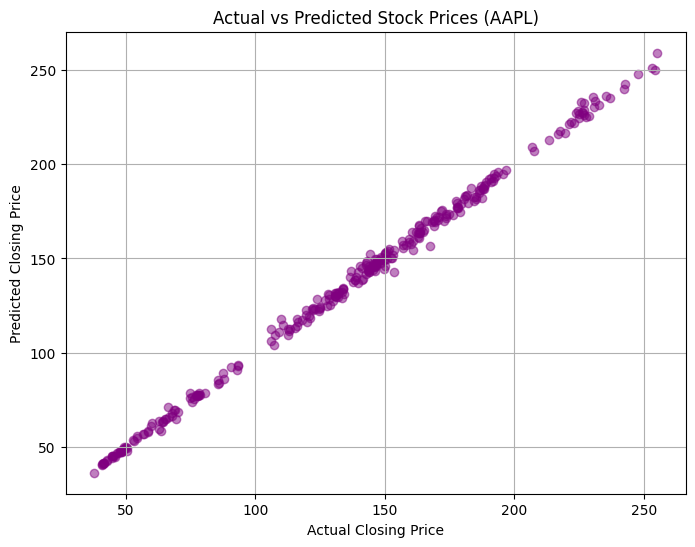

In [1]:
# 📦 Step 1: Install yfinance
!pip install yfinance
# 📈 Step 2: Import libraries and download Apple (AAPL) stock data
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download stock data (from Jan 2019 to Dec 2024)
data = yf.download('AAPL', start='2019-01-01', end='2024-12-31')

# Reset index so 'Date' becomes a column
data.reset_index(inplace=True)

# Show first few rows
print("📊 Preview of Data:")
print(data.head())

# 🧹 Step 3: Clean the data
# Drop rows with missing values
data.dropna(inplace=True)

# Create label: Tomorrow's price
data['Prediction'] = data['Close'].shift(-1)

# Remove last row with NaN prediction
data = data[:-1]

# Features and Target
X = data[['Close']]  # today’s closing price
y = data['Prediction']  # tomorrow’s closing price
# 🤖 Step 4: Split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"✅ Mean Squared Error: {mse:.2f}")
# 📊 Step 5: Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='purple', alpha=0.5)
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs Predicted Stock Prices (AAPL)")
plt.grid(True)
plt.show()